## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [3]:
dataset = pd.read_csv('titanic.csv')

print(dataset.describe())
print(dataset.shape)
print(dataset.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [4]:
missing_values = dataset.isnull().sum()

print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Атрибут Age має 177 пропущених значень.
Атрибут Cabin має 687 пропущених значень.
Атрибут Embarked має 2 пропущених значень.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



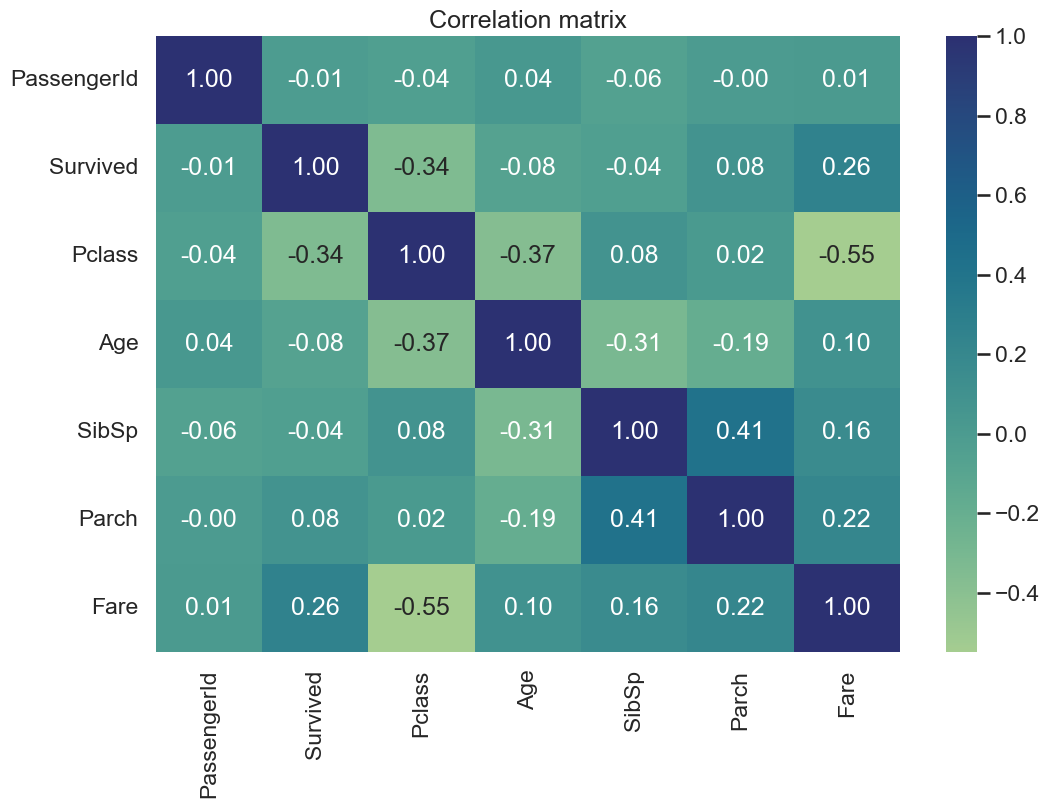

In [5]:
numeric_df = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title('Correlation matrix')
plt.show()

Ваші висновки: Аналіз матриці кореляції за методом Пірсона дозволяє встановити взаємозв'язки між числовими ознаками набору даних. Кореляційні коефіцієнти приймають значення від -1 до 1, де значення близьке до 1 вказує на сильну позитивну кореляцію, а близьке до -1 - на сильну негативну

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [7]:
def fill_missing_values(data, column, group_by_columns):
    data[column] = data.groupby(group_by_columns)[column].transform(lambda x: x.fillna(x.median()))
    return data

dataset_filled = fill_missing_values(dataset, 'Age', ['Sex', 'Pclass'])
print(dataset_filled.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: Функція fill_missing_values успішно заповнює пропущені значення в стовпці 'Age' медіаною за групами, використовуючи стовпці 'Sex' та 'Pclass' як критерії групування. Після застосування цієї функції до набору даних dataset, пропущені значення в стовпці 'Age' були успішно заповнені. Таким чином, дана функція є ефективним засобом для обробки пропущених даних.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





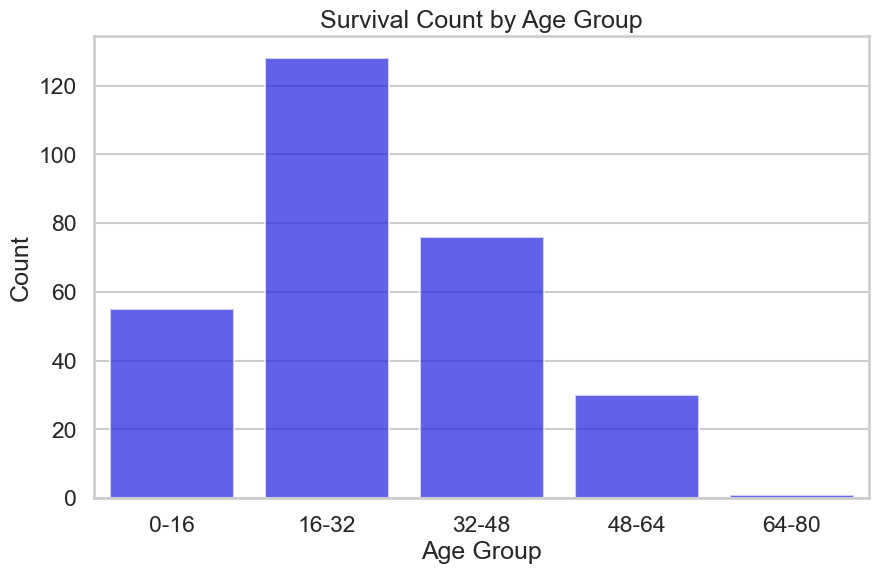

In [6]:
def create_age_bins(data, column='Age', num_bins=5):
    data['Age_bin'] = pd.cut(data[column], bins=num_bins, labels=False)
    return data

def plot_survival_by_age_group(data, survived_column='Survived', age_bin_column='Age_bin', num_bins=5):
    survived_age = data[data[survived_column] == 1][age_bin_column].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=survived_age.index, y=survived_age.values, color='blue', alpha=0.7)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.title('Survival Count by Age Group')
    plt.xticks(range(num_bins), [f'{i*16}-{(i+1)*16}' for i in range(num_bins)])
    plt.show()

dataset = create_age_bins(dataset)
plot_survival_by_age_group(dataset)

Ваші висновки: Найбільша кількість виживших спостерігається серед пасажирів у віці від 16 до 32 років. Це може бути пов'язано з тим, що ця група, ймовірно, має більше фізичної сили та можливостей для виживання в екстремальних умовах.

Кількість виживших поступово зменшується у старшій віковій групі. Це може бути пов'язано зі зниженням фізичних можливостей людей у цьому віці, а також з пріоритетом у врятуванні молодших членів екіпажу та пасажирів.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [7]:
def create_fare_quartiles(data, fare_column='Fare', num_quartiles=4):
    data['Fare_quartile'] = pd.qcut(data[fare_column], num_quartiles, labels=False)
    return data

def calculate_survival_by_quartile(data, quartile_column='Fare_quartile', target_column='Survived'):
    survival_by_quartile = data.groupby(quartile_column)[target_column].mean()
    return survival_by_quartile

dataset = create_fare_quartiles(dataset)
survived_by_quartile = calculate_survival_by_quartile(dataset)
print(survived_by_quartile)

Fare_quartile
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


Ваші висновки: Аналізуючи виживання пасажирів за квартильними значеннями вартості квитка (Fare), можна зробити висновок, що існує статистично значуща залежність між ціною квитка та ймовірністю виживання. Пасажири, які заплатили більше за квиток, мають вищу ймовірність виживання, що може бути пов'язано з їхнім класом обслуговування або розташуванням на кораблі. 

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [8]:
def add_family_related_features(data):
    data['Family_size'] = data['Parch'] + data['SibSp']
    data['Alone'] = (data['Family_size'] == 0).astype(int)
    return data

def calculate_survival_rate_by_group(data, group_column):
    survival_rate = data.groupby(group_column)['Survived'].mean()
    return survival_rate

dataset = add_family_related_features(dataset)
family_size_survived = calculate_survival_rate_by_group(dataset, 'Family_size')
alone_survived = calculate_survival_rate_by_group(dataset, 'Alone')

print(family_size_survived)
print(alone_survived)

Survival rate by family size: Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Survival rate if alone or not: Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Ваші висновки: Змінна Family_size: Пасажири з невеликою сім'єю мають вищий рівень виживання, ніж одинокі пасажири або ті, у кого більша сім'я. Це може бути пов'язано з більшою підтримкою та координацією у невеликих сім'ях під час кризових ситуацій.

Змінна Alone: Одинокі пасажири мають менший рівень виживання порівняно з тими, хто подорожує з сім'єю. Це може бути пов'язано з більшою підтримкою та допомогою, яку можуть надати члени сім'ї в кризових ситуаціях.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [8]:
def drop_columns_with_high_missing_values(data, threshold=50, additional_columns=None):
    missing_values = data.isnull().mean() * 100
    columns_to_drop = missing_values[missing_values > threshold].index.tolist()
    
    if additional_columns:
        columns_to_drop += additional_columns
    
    cleaned_data = data.drop(columns=columns_to_drop)
    return cleaned_data

additional_columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
cleaned_dataset = drop_columns_with_high_missing_values(dataset, additional_columns=additional_columns_to_drop)

print(cleaned_dataset.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Age_bin  \
0         0       3    male  22.0      1      0   7.2500        S      1.0   
1         1       1  female  38.0      1      0  71.2833        C      2.0   
2         1       3  female  26.0      0      0   7.9250        S      1.0   
3         1       1  female  35.0      1      0  53.1000        S      2.0   
4         0       3    male  35.0      0      0   8.0500        S      2.0   

   Fare_quartile  
0              0  
1              3  
2              1  
3              3  
4              1  


Ваші висновки: PassengerId: Унікальний ідентифікатор пасажира не містить корисної інформації для аналізу виживання або моделювання.

Name: Імена пасажирів також є унікальними та не несуть корисної інформації для аналізу або моделювання.

Ticket: Номери квитків не містять корисної інформації для аналізу або моделювання виживання.

Cabin: Цей атрибут містить багато пропущених значень та може нести обмежену або нерепрезентативну інформацію.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [9]:
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})

dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3}
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map(title_mapping)

print(dataset[['Sex', 'Embarked', 'Title']])

     Sex  Embarked  Title
0      0       0.0    0.0
1      1       1.0    2.0
2      1       0.0    1.0
3      1       0.0    2.0
4      0       0.0    0.0
..   ...       ...    ...
886    0       0.0    NaN
887    1       0.0    1.0
888    1       0.0    1.0
889    0       1.0    0.0
890    0       2.0    0.0

[891 rows x 3 columns]


/tmp/ipykernel_44157/3448730077.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipykernel_44157/3448730077.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


Ваші висновки: Sex: Значення 'male' було замінено на 0, а 'female' - на 1, щоб перетворити цей категоріальний атрибут в числовий.
Embarked: Значення 'S' було замінено на 0, 'C' - на 1, і 'Q' - на 2, щоб перетворити порт посадки в числове представлення.
Title: Використовуючи регулярний вираз, було витягнуто титул з атрибуту 'Name' для кожного пасажира. Ці титули були відображені у числових значеннях згідно із визначеною мапою, де 'Mr' - 0, 'Miss' - 1, 'Mrs' - 2, 'Master' - 3.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



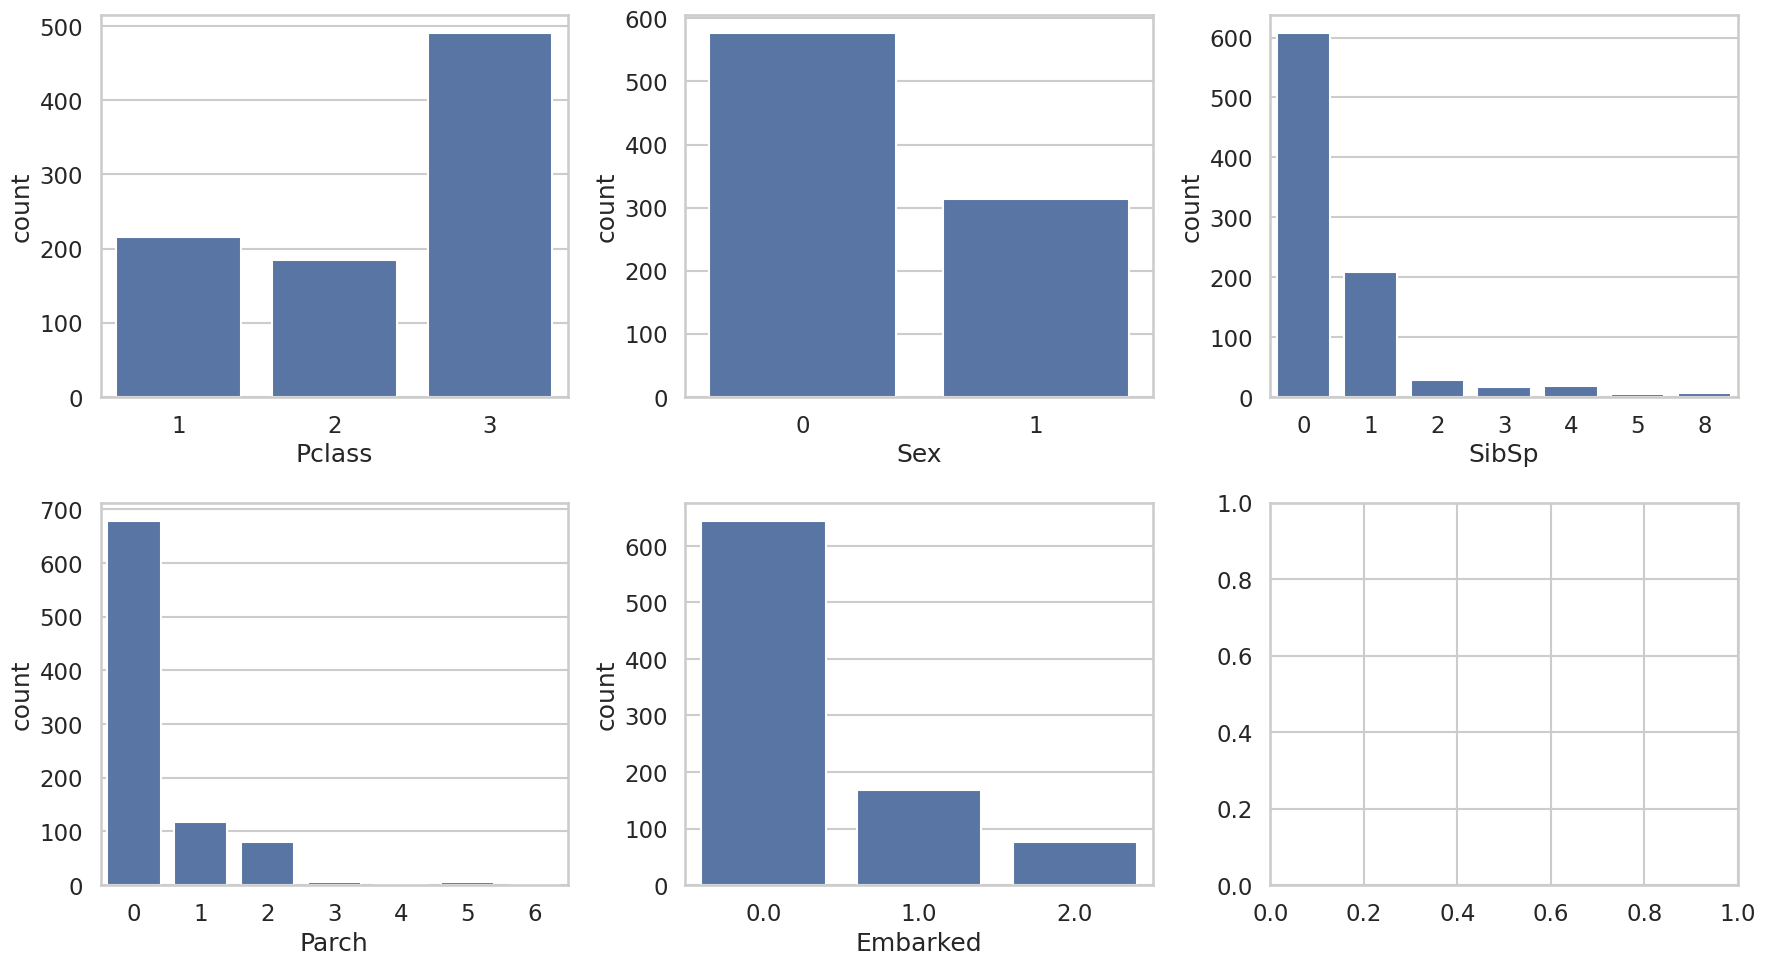

In [11]:
def plot_categorical_variables(data, categorical_variables):
    num_rows = (len(categorical_variables) - 1) // 3 + 1
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
    
    for i, var in enumerate(categorical_variables):
        sns.countplot(x=var, data=data, ax=axes[i // 3, i % 3])
    
    plt.tight_layout()
    plt.show()

categorical_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
plot_categorical_variables(dataset, categorical_variables)

Ваші висновки: Pclass (Клас пасажира): Більшість пасажирів подорожували 3-м класом, менша частина - 1-м та 2-м класом.

Sex (Стать): Кількість чоловіків більше, ніж кількість жінок у наборі даних.

SibSp (Кількість братів, сестер, подружжя на борту): Більшість пасажирів подорожували без братів, сестер або подружжя на борту, або з одним таким членом сім'ї.

Parch (Кількість батьків або дітей на борту): Більшість пасажирів подорожували без батьків або дітей на борту, або з одним таким членом сім'ї.

Embarked (Порт посадки): Більшість пасажирів посаджувалися в порту S (Southampton), на другому місці - порт C (Cherbourg), а найменше кількість пасажирів посаджувалися в порту Q (Queenstown).

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

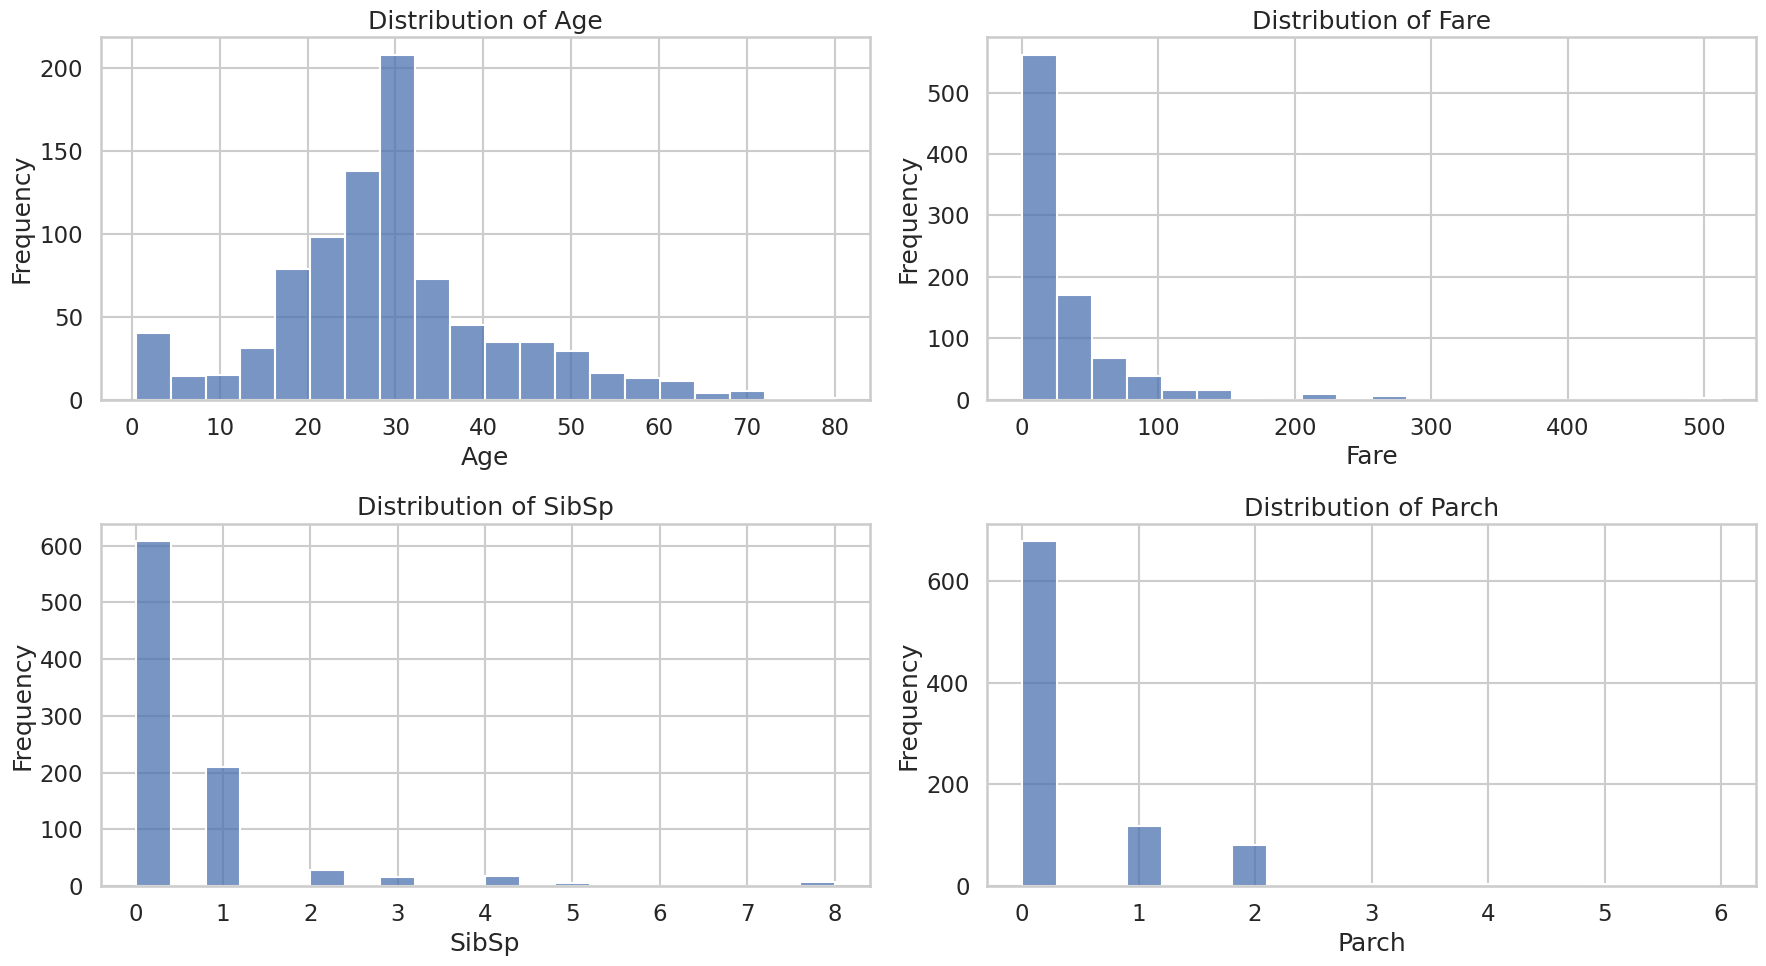

In [29]:
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i, var in enumerate(numeric_vars):
    sns.histplot(dataset[var], bins=20, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {var}')
    axes[i // 2, i % 2].set_xlabel(var)
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Ваші висновки: Age (Вік): Розподіл віку пасажирів має деяку скошеність вправо, що вказує на те, що більше пасажирів були молодшими, але також були представлені і старші вікові групи.

Fare (Вартість квитка): Розподіл вартості квитка сильно скошений вправо, що свідчить про те, що більшість квитків були недорогими, але є також кілька високих вартостей квитків.

SibSp (Кількість братів, сестер, подружжя на борту): Більшість пасажирів не мали або мали дуже малу кількість братів, сестер або подружжя на борту.

Parch (Кількість батьків або дітей на борту): Більшість пасажирів не мали або мали дуже малу кількість батьків або дітей на борту.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

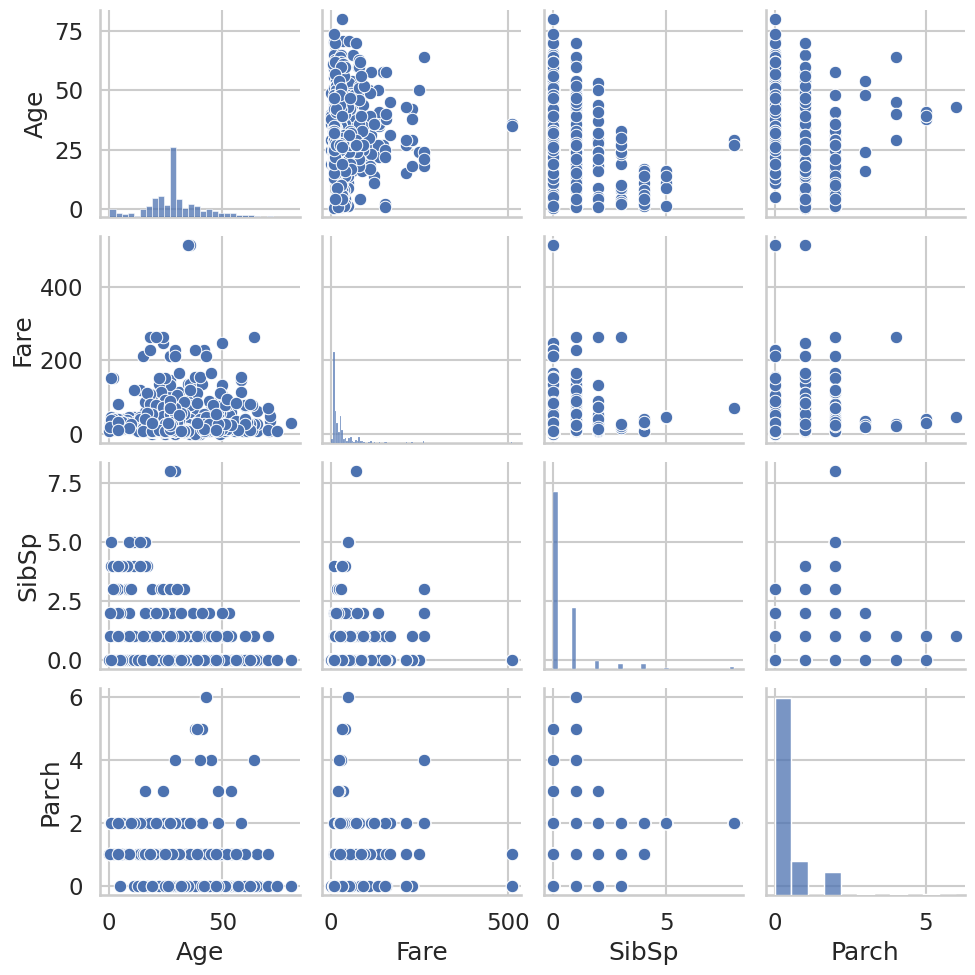

In [31]:
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(dataset[numeric_vars], diag_kind='hist')
plt.show()

Ваші висновки: Графіки співвідношення між числовими змінними дозволяють оцінити кореляцію між ними та виявити можливі закономірності. На графіках видно, що існує певна залежність між віком пасажирів і вартістю їх квитків, а також між кількістю братів, сестер, подружжя на борту та кількістю батьків або дітей на борту. Ці залежності можуть бути корисними для подальшого аналізу даних.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.